In [118]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=10000)


In [119]:
def verctorize_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.int8)
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = verctorize_seq(train_data)
x_test = verctorize_seq(test_data)
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')


In [144]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=['accuracy'])
x_val = x_train[:10000]
partitial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partitial_y_train = train_labels[10000:]
history= model.fit(partitial_x_train,
                  partitial_y_train,
                  epochs=5,
                  batch_size=512,
                  validation_data = (x_val, y_val))
result =model.evaluate(x_test,y_test)




Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 226us/step - loss: 0.4968 - accuracy: 0.7587 - val_loss: 0.3624 - val_accuracy: 0.8459
Epoch 2/5
15000/15000 [==============================] - 3s 211us/step - loss: 0.2619 - accuracy: 0.8975 - val_loss: 0.2788 - val_accuracy: 0.8885
Epoch 3/5
15000/15000 [==============================] - 3s 214us/step - loss: 0.1714 - accuracy: 0.9369 - val_loss: 0.3311 - val_accuracy: 0.8759
Epoch 4/5
15000/15000 [==============================] - 3s 215us/step - loss: 0.1147 - accuracy: 0.9586 - val_loss: 0.5460 - val_accuracy: 0.8237
Epoch 5/5
25000/25000 [==============================] - 4s 171us/step


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


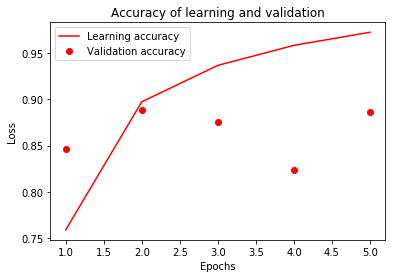

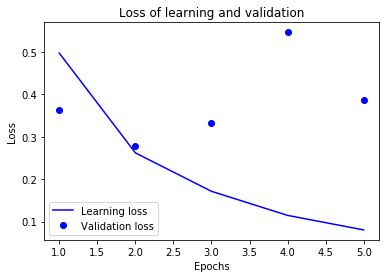

,0
0,0
1,0.19
2,0.69
3,0.99
4,0.99
5,0.34
6,0.9
7,1
8,0
9,0.46


In [145]:
import matplotlib.pyplot as plt

history_info = history.history
print(history_info.keys())

acc = history_info['accuracy']
val_acc = history_info['val_accuracy']
loss = history_info['loss']
val_loss = history_info['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label="Learning accuracy")
plt.plot(epochs, val_acc, 'ro', label="Validation accuracy")
plt.title("Accuracy of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label="Learning loss")
plt.plot(epochs, val_loss, 'bo', label="Validation loss")
plt.title("Loss of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

test_val=model.predict(x_test)[50:80]
round_val = np.around(test_val, decimals=2)
df=pd.DataFrame(round_val)
def color_val(val):
    if val >= 0.89 or val < 0.09:
        color = 'green'
    else:
        color = 'red'
    return "color: %s" %color
col = df.style.applymap(color_val)
col
